In [10]:
import io
import math
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [11]:
col_data = [("Genre", "|S20"),
            ("Artist", "|S50"),
            ("Track", "|S50"),
            ("Track ID", "|S22"),
            ("Popularity", int),
            ("Acousticness", float),
            ("Danceability", float),
            ("Duration (MS)", int),
            ("Energy", float),
            ("Instrumentalness", float),
            ("Key", "|S2"),
            ("Liveness", float),
            ("Loudness", float),
            ("Mode", int),
            ("Speechiness", float),
            ("Tempo", float),
            ("Time Signature", "|S3"),
            ("Valence", float)]

with io.open("SpotifyFeatures.csv", "r", encoding="utf-8") as f:
    data = np.genfromtxt(f, delimiter=",", skip_header=1, comments=None, dtype=col_data)

x array - 132096 x 8 
acousticness 5  
danceability 6    
energy 8  
instrumentalness 9  
liveness 11  
speechiness 14  
tempo 15 (normalized to be between 0 and 1)   
valence 17  

should we also include key, time signature, mode? (will need to map to numbers)  

y array - 132096 x 1  
genres (the true labels) mapped to numbers

In [38]:
x = np.empty((data.shape[0], 8))
y = np.empty((data.shape[0], 1))
genre_mapping_dict = {}
genre_idx = 0

for i in range(len(data)):
    row = data[i]
    genre = row[0].decode("utf-8")
    if not genre in genre_mapping_dict:
        genre_mapping_dict[genre] = genre_idx
        genre_idx += 1
    y[i] = genre_mapping_dict[genre]
    
    values = [row[5], row[6], row[8], 
              row[9], row[11], row[14], 
              row[15], row[17]]
    x[i, :] = values

# normalize tempo column
max_tempo = np.max(x[:, 6])
min_tempo = np.min(x[:, 6])
x[:, 6] = (x[:, 6] - min_tempo) / (max_tempo - min_tempo)

In [39]:
# split X and Y into training and test 
from sklearn.model_selection import train_test_split
TEST_PERCENTAGE = 10

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = TEST_PERCENTAGE / 100)

In [70]:
# linear regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_train, y_train)  # perform linear regression
y_pred = np.round(linear_regressor.predict(x_test))  # make predictions
score = linear_regressor.score(x_test, y_test)
print("Score: " + str(score))

Score: 0.07910546219216963


In [69]:
# ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0, fit_intercept=True)
ridge_reg.fit(x_train, y_train)
y_pred = np.round(ridge_reg.predict(x_test))
score = ridge_reg.score(x_test, y_test)
print("Score: " + str(score))

Score: 0.07912175077283479


In [75]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C = 0.95)
fit = logit.fit(x_train, y_train)
print("The score for logistic regression is")
#score returns mean accuracy
print("Training: {:6.2f}%".format(100*logit.score(x_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(x_test, y_test)))

C:\Users\bglow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bglow\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bglow\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The score for logistic regression is
Training:  30.55%
Test set:  29.57%


In [76]:

# https://medium.com/latinxinai/discovering-descriptive-music-genres-using-k-means-clustering-d19bdea5e443
from sklearn.cluster import KMeans

NUM_CENTERS = 14 # number of genres from data
kmeans = KMeans(n_clusters=NUM_CENTERS).fit(x)
# 8, 11, 14, 17, 20 clusters
# run elbow method to find optimal number of clusters?

(14, 8)


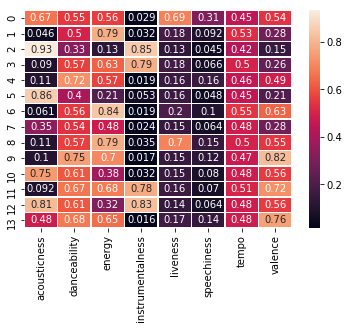

In [48]:
print(kmeans.cluster_centers_.shape)

import seaborn as sns
xlabels = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "valence"]
ax = sns.heatmap(kmeans.cluster_centers_, linewidth=0.5, xticklabels=xlabels, annot=True)
plt.show()

Explained variance ratio of training set: [0.96579436 0.03389201]
Explained variance ratio of the test set: [0.96570297 0.03398154]
Explained variance ratio of all data: [0.96571199 0.0339727 ]


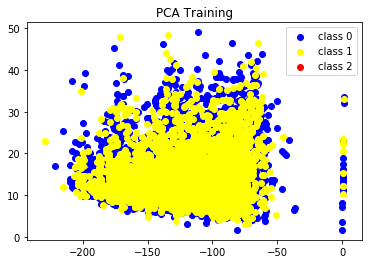

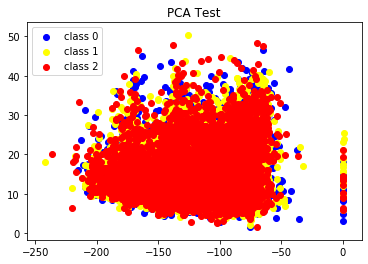

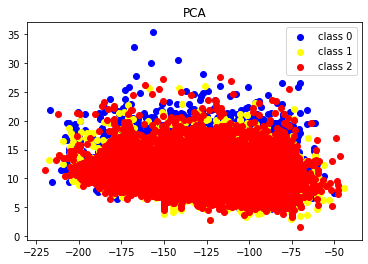

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x,y)
comp, evr = (pca.components_.T, pca.explained_variance_ratio_)
print('Explained variance ratio of all data: %s' % str(evr))
pcaPlot2 = (x @ comp).T
plt.title("PCA")
plt.scatter(pcaPlot2[0][:class0],pcaPlot2[1][:class0], c='blue', label="class 0")
plt.scatter(pcaPlot2[0][class0:class1],pcaPlot2[1][class0:class1], c='yellow', label="class 1")
plt.scatter(pcaPlot2[0][class1:class2],pcaPlot2[1][class1:class2], c='red', label="class 2")
plt.legend()